In [17]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import librosa.feature

In [10]:
from ipynb.fs.full.preparation import get_audio_path, get_librosa_audio

audio_paths = get_audio_path()
audio_librosa = get_librosa_audio()

In [32]:
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)

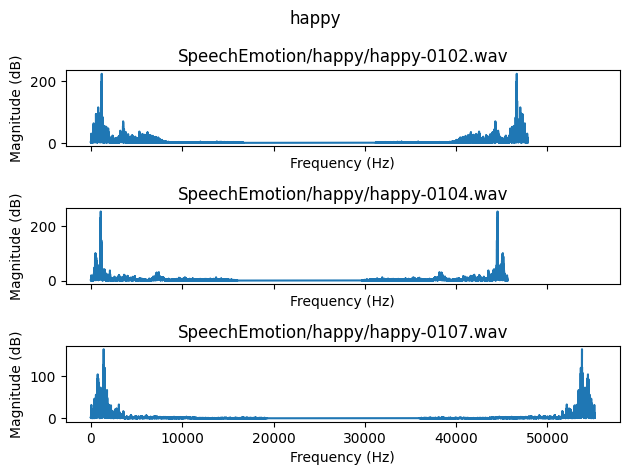

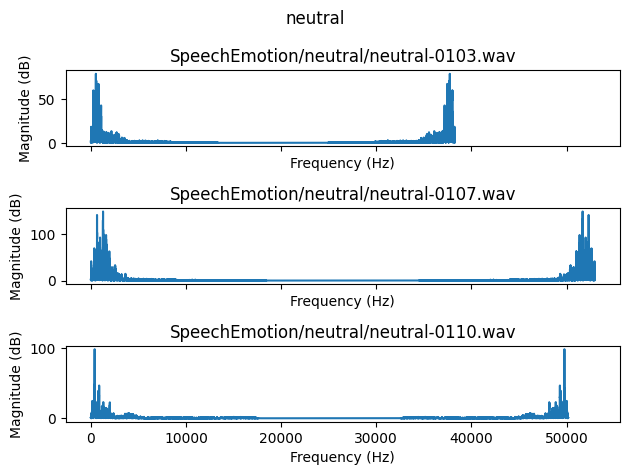

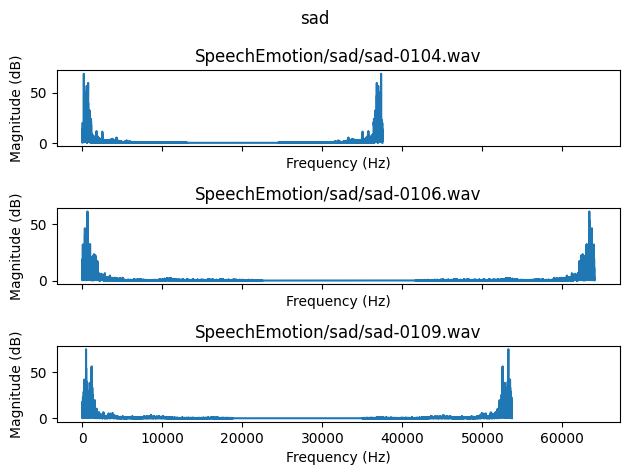

In [15]:
def spectrum(wave):
    x = np.fft.fft(wave[0])
    x_mag = np.absolute(x)

    f = np.fft.fftfreq(len(wave[0]), 1 / wave[1])


    return (f, x_mag)

def display_spectrum(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        f, mag = spectrum(wave)

        ax[i].plot(mag)
        ax[i].set_xlabel('Frequency (Hz)')
        ax[i].set_ylabel('Magnitude (dB)')
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_spectrum(key, values)

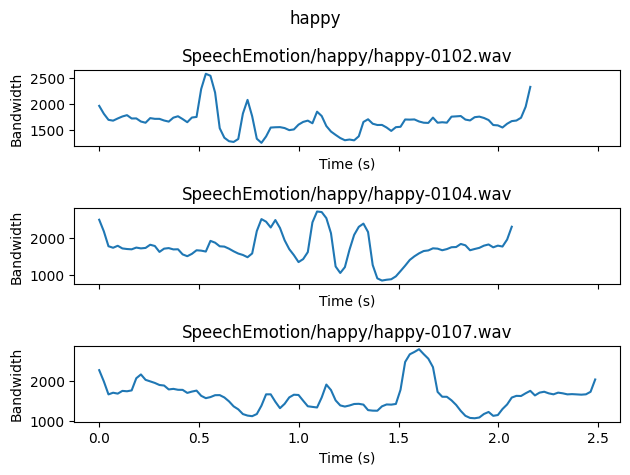

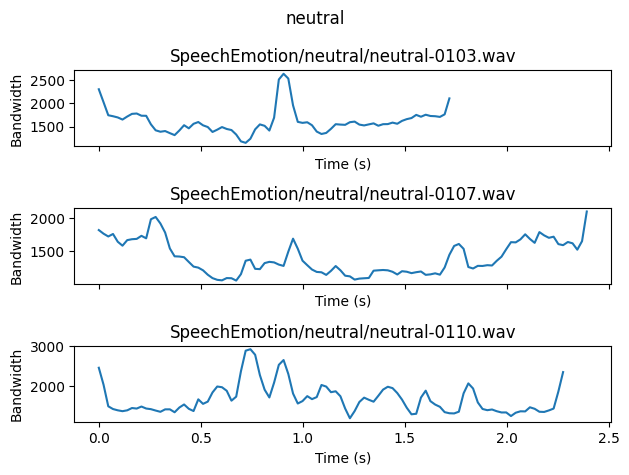

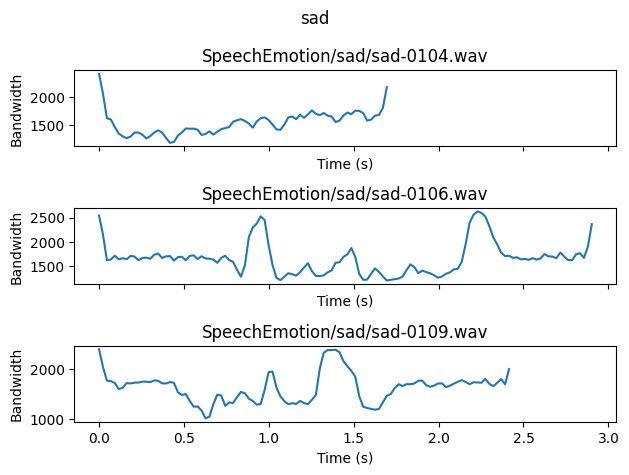

In [31]:
def spectral_bandwidth(wave):
    sb = librosa.feature.spectral_bandwidth(y = wave[0] + 0.01, sr = wave[1], norm = True)[0]
    return sb

def display_sb(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        sb = spectral_bandwidth(wave)
        frames = range(len(sb))
        times = librosa.frames_to_time(frames)

        ax[i].plot(times, sb)
        ax[i].set_xlabel('Time (s)')
        ax[i].set_ylabel('Bandwidth')
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_sb(key, values)

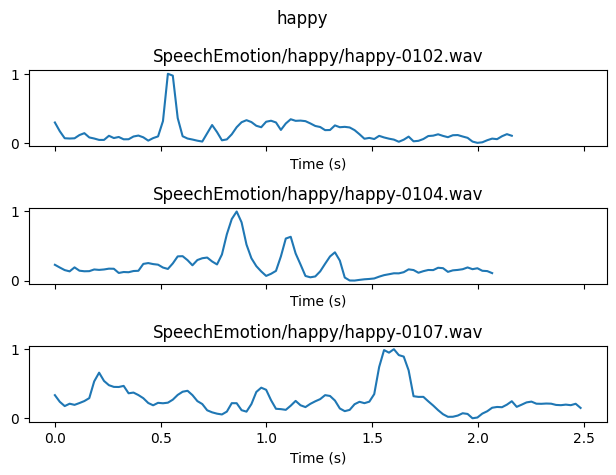

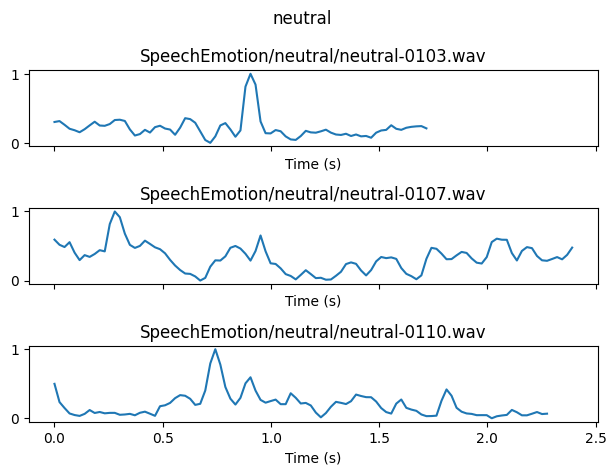

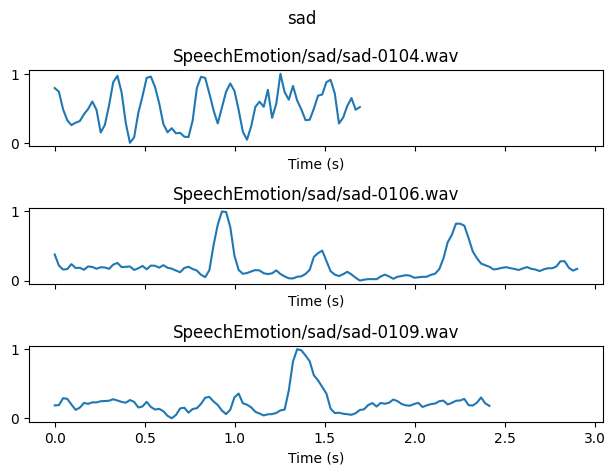

In [37]:
def spectral_centroid(wave):
    sc = librosa.feature.spectral_centroid(y = wave[0], sr = wave[1])[0]
    return sc

def display_sc(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        sc = spectral_centroid(wave)
        frames = range(len(sc))
        times = librosa.frames_to_time(frames)

        ax[i].plot(times, normalize(sc, ))
        ax[i].set_xlabel('Time (s)')
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_sc(key, values)